# FACE EMOTION RECOGNITION

# IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# WORKING WITH A PRE LOADED IMAGE FROM DATASET

In [2]:
img_array = cv2.imread("train/0/Training_3908.jpg") #LOADING A TRAINING IMAGE

In [3]:
img_array.shape #PRINTING THE SHAPE OF THE LOADED IMAGE

(48, 48, 3)

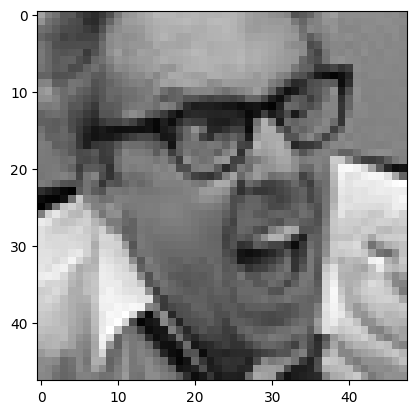

In [4]:
plt.imshow(img_array) #PRINTING THE IMAGE AS ARRAY

In [5]:
print(img_array) #PRINITNG THE ARRAY OF THE IMAGE

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


# IMPORTING THE DATASET

In [6]:
Datadirectory= "train/" 

In [7]:
Classes= ["0","1","2","3","4","5","6"]  #CLASSES REFERS TO THE FOLDERS OF THE TRAIN DIRECTORY

# CLASSES 0=ANGRY, 1=DISGUST, 2=FEAR,3= HAPPY 4= NEUTRAL, 5= SAD, 6 = SURPRISE

# RESIZING THE  IMAGES OF THE DATASET

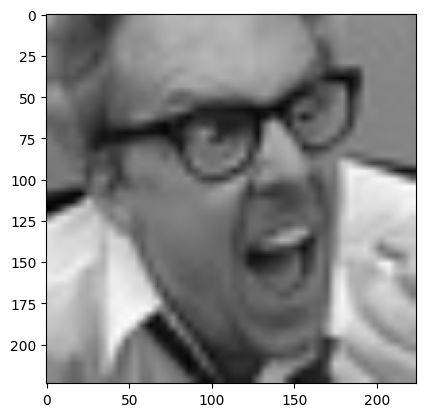

In [8]:
img_size = 224
new_array= cv2.resize(img_array,(img_size,img_size))
plt.imshow( cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape #SHAPE AFTER RESIZING THE IMAGE

(224, 224, 3)

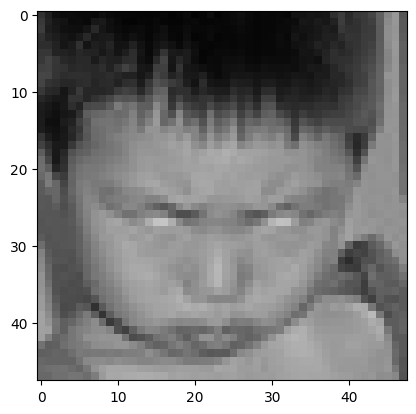

In [10]:
for category in Classes:
    path=os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

# CONVERTING THE IMAGES INTO ARRAY AND STORING IN TRAINING DATA

In [11]:
training_Data = []
def create_training_Data():
  for category in Classes:
    path = os.path.join(Datadirectory, category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_Data.append([new_array, class_num])
      except Exception as e:
        pass

In [12]:
create_training_Data()

In [13]:
print(len(training_Data))  #COUNTING THE TOTAL NO. OF DATA IN THE DATASET

2948


# SHUFFLING THE DATA RANDOMLY

In [14]:
import random
random.shuffle(training_Data)

# separate the features and labels

In [15]:
X=[]
y = []
for features, label in training_Data:
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 3) # 3 is the channel for RGB

In [16]:
X.shape  #PRINTING THE SHAPE OF THE 

(2948, 224, 224, 3)

In [17]:
X = X/255.0 #NORMALIZING IMAGE PIXEL

In [18]:
y[1500]

1

In [19]:
Y=np.array(y)

In [20]:
Y.shape 

(2948,)

# DEFINING THE MODEL

In [21]:
model = tf.keras.applications.MobileNetV2()  #USING MOBILENETV2 APPLICATION FOR MODELLING THE DATA

In [22]:
model.summary() 

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [23]:
base_input= model.layers[0].input

In [24]:
base_output= model.layers[-2].output

In [25]:
base_output #PRINITNG THE LAST OUTPUT OF THE MODEL

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

# WORKING OF DENSE LAYERS AND ACTIVATING THE NEURONS 

In [26]:
final_output = layers.Dense(128)(base_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput)

In [27]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [28]:
new_model = keras.Model(inputs = base_input, outputs=final_output) # CREATING A NEW MODEL AFTER RESHAPING

In [29]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

# TRAINING AND COMPILING THE MODEL

In [30]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [ ]:
history = new_model.fit(X,Y, epochs=20)

Epoch 1/20
93/93 [==============================] - 362s 4s/step - loss: 1.6461 - accuracy: 0.3636
Epoch 2/20
93/93 [==============================] - 371s 4s/step - loss: 1.3171 - accuracy: 0.5146
Epoch 3/20
93/93 [==============================] - 368s 4s/step - loss: 1.1764 - accuracy: 0.5675
Epoch 4/20
93/93 [==============================] - 343s 4s/step - loss: 1.0236 - accuracy: 0.6292
Epoch 5/20
93/93 [==============================] - 356s 4s/step - loss: 1.0486 - accuracy: 0.6204
Epoch 6/20
93/93 [==============================] - 341s 4s/step - loss: 0.8546 - accuracy: 0.6940
Epoch 7/20
93/93 [==============================] - 341s 4s/step - loss: 0.7048 - accuracy: 0.7527
Epoch 8/20
93/93 [==============================] - 345s 4s/step - loss: 0.7139 - accuracy: 0.7476
Epoch 9/20
93/93 [==============================] - 378s 4s/step - loss: 0.6111 - accuracy: 0.7900
Epoch 10/20
93/93 [==============================] - 364s 4s/step - loss: 0.5562 - accuracy: 0.8012
Epoch 11/

# PLOTTING THE GRAPH

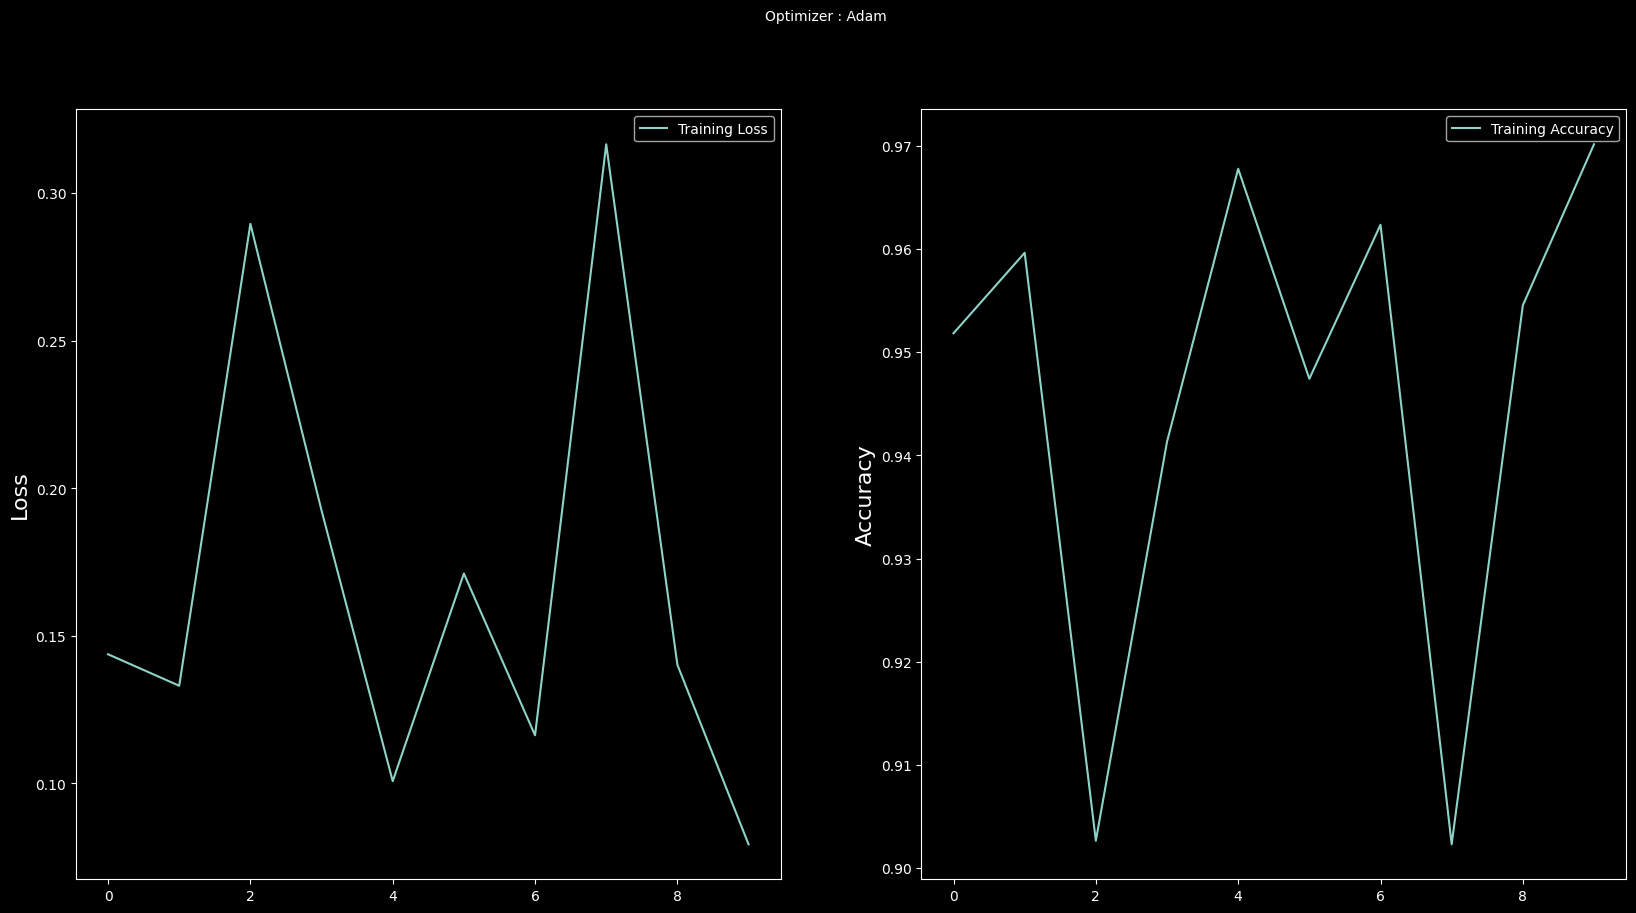

In [129]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(new_model.history.history['loss'], label='Training Loss')
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(new_model.history.history['accuracy'], label='Training Accuracy')
plt.legend(loc='upper right')
plt.show()



In [130]:
new_model.save("my_model.h5")  #SAVING THE MODEL

In [131]:
new_model = tf.keras.models.load_model('my_model.h5')  #LOADING THE TRAINED MODEL

# PREDICTING THE EMOTION OF AN IMAGE

In [171]:
frame = cv2.imread("sad.jpg") #IMPORTING AN IMAGE
frame.shape #PRINING THE SHAPE OF THE IMAGE

(407, 612, 3)

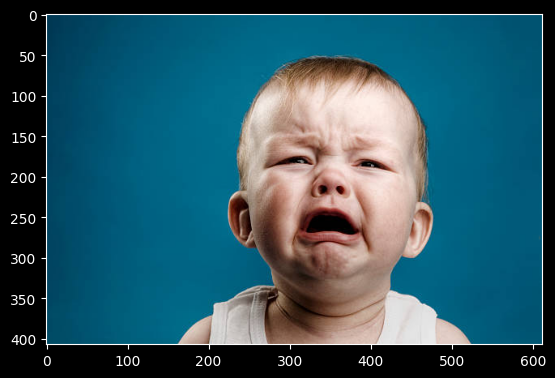

In [172]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [173]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') #LOADING THE HAARCASCADE XML FILE

In [174]:
gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #CONVERTING THE IMAGE TO GRAYSCALE
gray.shape #PRINTING THE SHAPE OF THE IMAGE

(407, 612)

# CODE FOR DETECTING THE IMAGE PREDICTION

In [175]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi=roi_color[ey:ey+eh,ex:ex+ew]

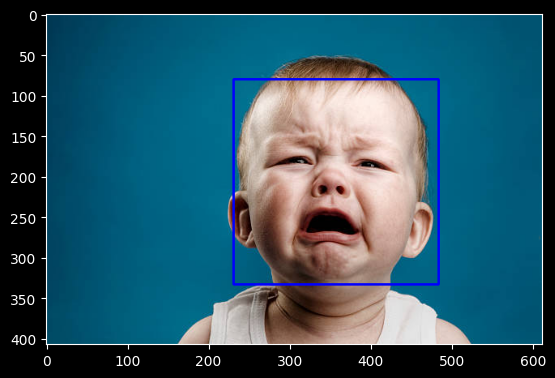

In [176]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) #PLOTTING THE IMAGE

In [177]:
# RESIZING AND NORMALIZING THE IMAGE
final_image= cv2.resize(frame,(224,224))
final_image= np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

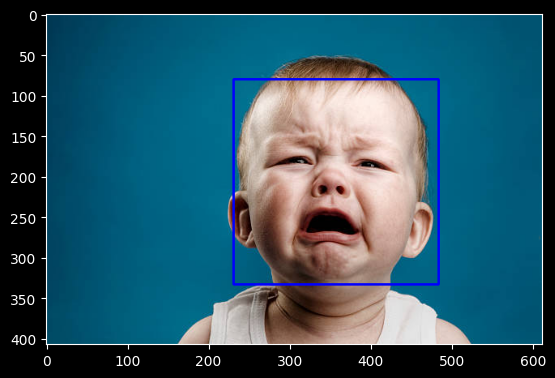

In [178]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) #PLOTTING THE IMAGE

In [179]:
Predictions = new_model.predict(final_image) #PREDICTING THE FINAL IMAGE

1/1 [==============================] - 0s 57ms/step


In [180]:
Predictions[0]

array([1.8815240e-02, 2.0065898e-05, 8.5059095e-05, 5.1214029e-03,
       9.7560185e-01, 3.5000205e-04, 6.3640946e-06], dtype=float32)

In [181]:
np.argmax(Predictions) #PREDICTING THE EMOTION

4

# AS THE PREDICTION IS 3 i.e. HAPPY SO IT PREDICTED A CORRECT OUTPUT

# CODE FOR WEBCAM USING OPENCV AND RECOGNIZING THE REAL TIME FACE EMOTION

In [187]:
import cv2
import numpy as np
import tensorflow as tf
from keras.applications.mobilenet_v2 import preprocess_input
#from keras.preprocessing.image import img_to_array

# Load pre-trained model
model = tf.keras.models.load_model('my_model.h5')

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Initialize OpenCV face detector
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#face_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
#face_cascade = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')
# Initialize camera
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error opening video stream or file")

while True:
    # Read image from camera
    ret, img = cap.read()
    if ret:
    # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        # Process each detected face
        for (x,y,w,h) in faces:
            # Extract face region of interest
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]

            # Resize face image to match input shape of model
            #roi_gray = cv2.resize(roi_gray, (224, 224), interpolation=cv2.INTER_AREA)
            #roi_gray = roi_gray.reshape(1, 224, 224, 1)
            # Convert grayscale image to RGB
            #roi_color = cv2.cvtColor(roi_color, cv2.COLOR_BGR2GRAY)

    # Resize image to 224x224 and preprocess for model
            roi_color = cv2.resize(roi_color, (224, 224))
            roi_color = np.array(roi_color)
            roi_color = np.expand_dims(roi_color, axis=0)
            roi_color = preprocess_input(roi_color)

    # Predict emotion using pre-trained model
            #prediction = new_model.predict(roi_color)
            #emotion = emotion_labels[np.argmax(prediction)]

            # Normalize pixel values
            roi_gray = roi_gray / 255.0

            # Predict emotion using pre-trained model
            #prediction = model.predict(roi_gray)
            #emotion = emotion_labels[np.argmax(prediction)]
            prediction = model.predict(roi_color)
            emotion = emotion_labels[np.argmax(prediction)]
            # Draw bounding box and label on face
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(img, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Display output image
        cv2.imshow('Face Emotion Recognition', img)

    # Break loop when 'q' key is pressed
    
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        print("Error reading video stream")
        break
# Release resources
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 68ms/step


In [185]:
'''import cv2
import datetime
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
while True:
    _, frame = cap.read()
    original_frame = frame.copy()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.3, 5)
    for x, y, w, h in face:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 2)
        face_roi = frame[y:y+h, x:x+w]
        gray_roi = gray[y:y+h, x:x+w]
        smile = smile_cascade.detectMultiScale(gray_roi, 1.3, 25)
        for x1, y1, w1, h1 in smile:
            cv2.rectangle(face_roi, (x1, y1), (x1+w1, y1+h1), (0, 0, 255), 2)
            time_stamp = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
            file_name = f'selfie-{time_stamp}.png'
            cv2.imwrite(file_name, original_frame)
    cv2.imshow('camera', frame)
    if cv2.waitKey(10) == ord('q'):
        break'''

"import cv2\nimport datetime\ncap = cv2.VideoCapture(0)\nface_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')\nsmile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')\nwhile True:\n    _, frame = cap.read()\n    original_frame = frame.copy()\n    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)\n    face = face_cascade.detectMultiScale(gray, 1.3, 5)\n    for x, y, w, h in face:\n        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 2)\n        face_roi = frame[y:y+h, x:x+w]\n        gray_roi = gray[y:y+h, x:x+w]\n        smile = smile_cascade.detectMultiScale(gray_roi, 1.3, 25)\n        for x1, y1, w1, h1 in smile:\n            cv2.rectangle(face_roi, (x1, y1), (x1+w1, y1+h1), (0, 0, 255), 2)\n            time_stamp = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')\n            file_name = f'selfie-{time_stamp}.png'\n            cv2.imwrite(file_name, original_frame)\n    cv2.imshow('camera', frame)\n    if cv2.waitKey(10) == ord('q'):\n 